In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import string

In [4]:
traindata = pd.read_csv("train.csv")
testdata = pd.read_csv("test.csv")
submissiondata = pd.read_csv("sample_submission.csv") 

In [5]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
data_clean = clean_text(traindata, "text")
data_clean.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake may allah forgive us all,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orders in california,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as smoke from wildfires pours into a school,1


In [6]:
stop = stopwords.words('english')
data_clean['text'] = data_clean['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officers evacuation shelter place orders expected,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orders california,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pours school,1


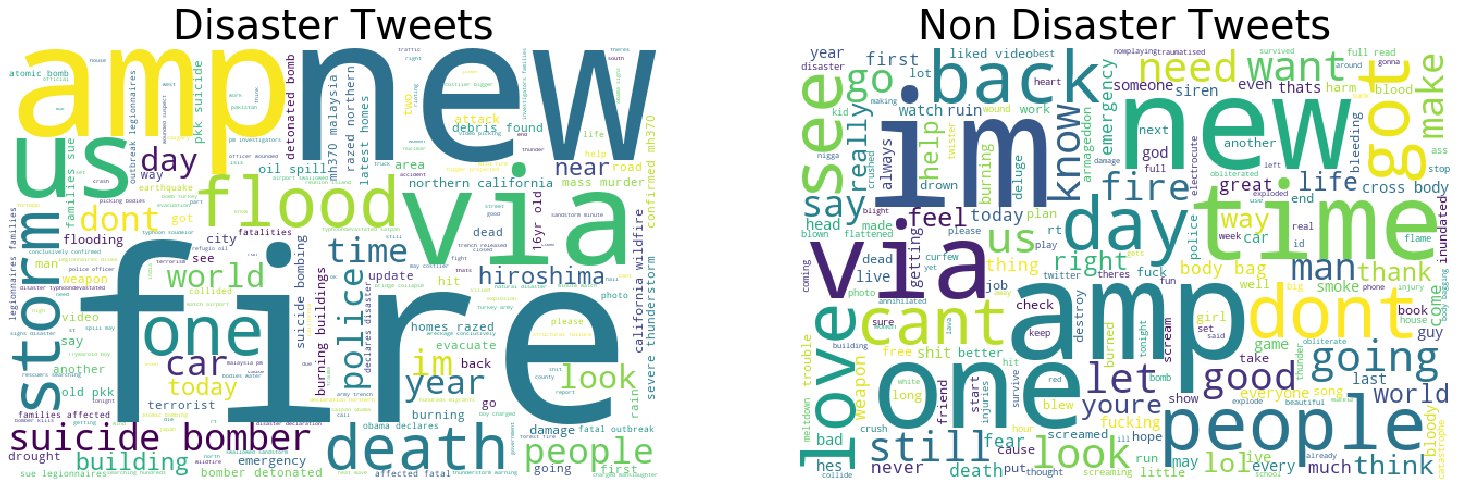

In [7]:
from wordcloud import WordCloud

disaster_tweets = data_clean[data_clean['target']==1]['text']
non_disaster_tweets = data_clean[data_clean['target']==0]['text']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

In [8]:
stop_words = set(stopwords.words("english"))

#add words that aren't in the NLTK stopwords list
new_stopwords = ['new','amp','people']
new_stopwords_list = stop_words.union(new_stopwords)
data_clean['text'] = data_clean['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (new_stopwords_list)]))


In [32]:
print(new_stopwords_list)

{'yourself', 'doing', 'you', "weren't", 're', 'been', 'were', 'ma', 'so', 'with', 'hasn', "you'll", 'very', "couldn't", 'nor', "shouldn't", 'having', 'now', 'why', 'from', 'about', 'down', 'again', 'to', 'its', 'same', 'isn', 'for', 'did', 'there', 'had', 'am', 'all', 'can', "mustn't", 'because', 'theirs', 'some', 'shan', 'mightn', 'they', "should've", 'the', 'both', 'few', 'once', 'will', "hadn't", "you're", 't', 'hadn', 'our', "she's", 'under', 'at', 'more', 'if', 'be', 'each', 'have', 'does', 'haven', 'it', 'ours', 'ourselves', 'but', 'mustn', 'too', 'his', 'in', 'amp', 'we', 'myself', 'further', 'an', 'most', 'yourselves', 'was', 'which', 'people', "mightn't", 'into', 'off', 'their', 'here', 'other', 'when', 'himself', 'only', "don't", 'o', 'she', 'themselves', 'then', 'while', 'he', 'herself', 'don', 'ain', 'him', 'are', 'has', 'wasn', 'weren', "needn't", 'during', 'up', 'won', 'own', "wasn't", 'y', 'being', "you'd", 'above', "isn't", 'such', 'didn', "it's", 'couldn', 'through', '

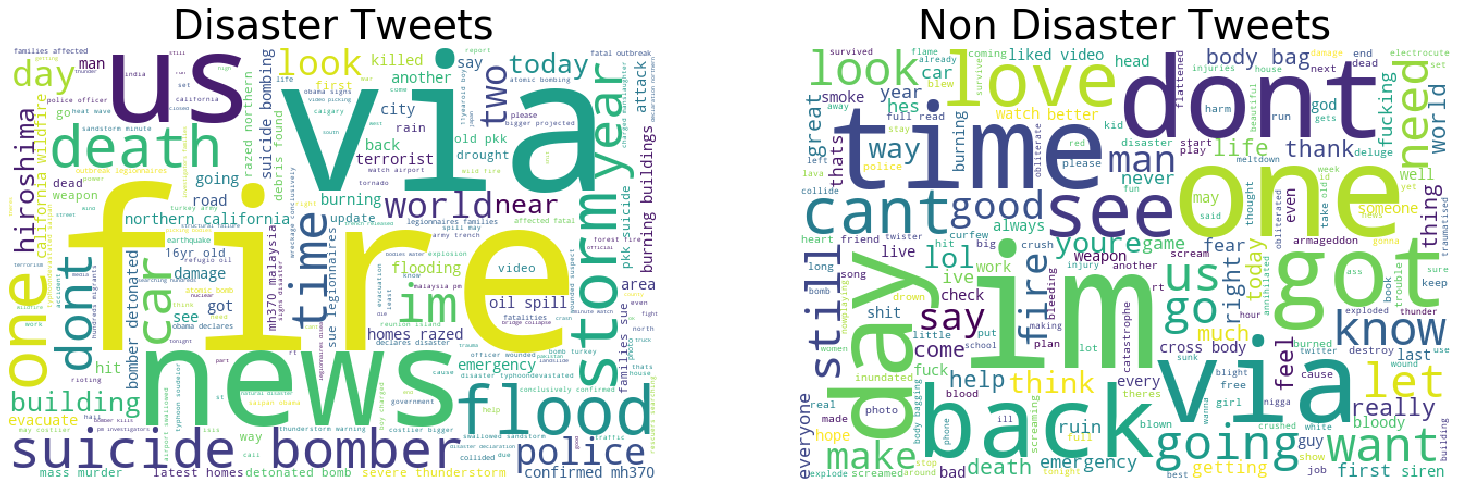

In [9]:
from wordcloud import WordCloud

disaster_tweets = data_clean[data_clean['target']==1]['text']
non_disaster_tweets = data_clean[data_clean['target']==0]['text']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_clean['text'],data_clean['target'],random_state = 0)

In [12]:
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('classifier', SGDClassifier()),
])
model1 = pipeline_sgd.fit(X_train, y_train)


y_predict = model1.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1107
           1       0.77      0.71      0.74       797

    accuracy                           0.79      1904
   macro avg       0.79      0.78      0.78      1904
weighted avg       0.79      0.79      0.79      1904



In [13]:
submission_test_clean = testdata.copy()
submission_test_clean = clean_text(submission_test_clean, "text")
submission_test_clean['text'] = submission_test_clean['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
submission_test_clean = submission_test_clean['text']
submission_test_clean.head()

0    happened terrible car crash                                  
1    heard earthquake different cities stay safe everyone         
2    forest fire spot pond geese fleeing across street cannot save
3    apocalypse lighting spokane wildfires                        
4    typhoon soudelor kills 28 china taiwan                       
Name: text, dtype: object

In [14]:
submission_test_pred1 = model1.predict(submission_test_clean)

In [15]:
id_col = testdata['id']
submission_df_1 = pd.DataFrame({
                  "id": id_col, 
                  "target": submission_test_pred1})
submission_df_1.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [16]:
submission_df_1.to_csv('submission_1.csv', index=False)

In [17]:
from sklearn.naive_bayes import MultinomialNB
pipeline_nb = Pipeline([
    ('bow',CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
model2 = pipeline_nb.fit(X_train, y_train)

In [18]:
y_predict2 = model2.predict(X_test)
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1107
           1       0.82      0.66      0.73       797

    accuracy                           0.80      1904
   macro avg       0.80      0.78      0.78      1904
weighted avg       0.80      0.80      0.79      1904



In [19]:
submission_test_pred2 = model2.predict(submission_test_clean)

In [20]:
id_col = testdata['id']
submission_df_2 = pd.DataFrame({
                  "id": id_col, 
                  "target": submission_test_pred2})
submission_df_2.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [21]:
submission_df_2.to_csv('submission_2.csv', index=False)

In [22]:
from sklearn.linear_model import LogisticRegression
pipeline_LR = Pipeline([
    ('bow',CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ LogisticRegression classifier
])
model3 = pipeline_LR.fit(X_train, y_train)

D:\Apps\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
y_predict3 = model3.predict(X_test)
print(classification_report(y_test, y_predict3))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1107
           1       0.83      0.66      0.74       797

    accuracy                           0.80      1904
   macro avg       0.81      0.78      0.79      1904
weighted avg       0.81      0.80      0.80      1904



In [24]:
submission_test_pred3 = model3.predict(submission_test_clean)

In [25]:
id_col = testdata['id']
submission_df_3 = pd.DataFrame({
                  "id": id_col, 
                  "target": submission_test_pred3})
submission_df_3.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [26]:
submission_df_3.to_csv('submission_3.csv', index=False)

In [27]:
import xgboost as xgb
from xgboost import XGBClassifier
pipeline_xgb = Pipeline([
    ('bow',CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', XGBClassifier()),  # train on TF-IDF vectors w/ XGB classifier
])
model4 = pipeline_xgb.fit(X_train, y_train)

In [28]:
y_predict4 = model4.predict(X_test)
print(classification_report(y_test, y_predict4))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1107
           1       0.83      0.60      0.70       797

    accuracy                           0.78      1904
   macro avg       0.80      0.76      0.76      1904
weighted avg       0.79      0.78      0.77      1904



In [29]:
submission_test_pred4 = model4.predict(submission_test_clean)

In [30]:
id_col = testdata['id']
submission_df_4 = pd.DataFrame({
                  "id": id_col, 
                  "target": submission_test_pred4})
submission_df_4.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [31]:
submission_df_4.to_csv('submission_4.csv', index=False)